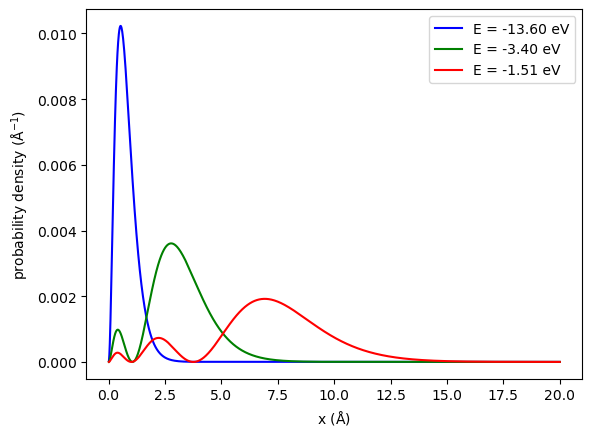

In [2]:
import numpy as np
from scipy import constants as const
from scipy import sparse as sparse
from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt
 
hbar = const.hbar
e = const.e
m_e = const.m_e
pi = const.pi
epsilon_0 = const.epsilon_0
joul_to_eV = e
 
def calculate_potential_term(r):
    potential = e**2 / (4.0 * pi * epsilon_0) / r
    potential_term = sparse.diags((potential))
    return potential_term
 
def calculate_angular_term(r):
    angular = l * (l + 1) / r**2
    angular_term = sparse.diags((angular))
    return angular_term
 
def calculate_laplace_three_point(r):
    h = r[1] - r[0]
     
    main_diag = -2.0 / h**2 * np.ones(N)     
    off_diag  =  1.0 / h**2 * np.ones(N - 1)
    laplace_term = sparse.diags([main_diag, off_diag, off_diag], (0, -1, 1))
    return laplace_term
     
def build_hamiltonian(r):
    laplace_term =   calculate_laplace_three_point(r)
    angular_term =   calculate_angular_term(r)
    potential_term = calculate_potential_term(r)
     
    hamiltonian = -hbar**2 / (2.0 * m_e) * (laplace_term - angular_term) - potential_term
 
    return hamiltonian
 
def plot(r, densities, eigenvalues):
    plt.xlabel('x ($\\mathrm{\AA}$)')
    plt.ylabel('probability density ($\\mathrm{\AA}^{-1}$)')
     
    energies = ['E = {: >5.2f} eV'.format(eigenvalues[i].real / e) for i in range(3)]
    plt.plot(r * 1e+10, densities[0], color='blue',  label=energies[0])
    plt.plot(r * 1e+10, densities[1], color='green', label=energies[1])
    plt.plot(r * 1e+10, densities[2], color='red',   label=energies[2])
     
    plt.legend()
    plt.show()
    return
 
""" set up horizontal axis and hamiltonian """
N = 2000
l = 0
r = np.linspace(2e-9, 0.0, N, endpoint=False)
hamiltonian = build_hamiltonian(r)
 
""" solve eigenproblem """
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')
 
""" sort eigenvalue and eigenvectors """
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
eigenvalues = np.sort(eigenvalues)
 
""" compute probability density for each eigenvector """
densities = [np.absolute(eigenvectors[i, :])**2 for i in range(len(eigenvalues))]
 
""" plot results """
plot(r, densities, eigenvalues)